### *Загрузка данных*

In [1]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd
import tqdm
import pyarrow
import numpy as np

In [4]:
path = 'data_python/final_work_2/train_data/'

In [5]:
def read_parquet_dataset_from_local(path_to_dataset: str, start_from: int = 0,
                                     num_parts_to_read: int = 2, columns=None, verbose=False) -> pd.DataFrame:


    res = []
    dataset_paths = sorted([os.path.join(path_to_dataset, filename) for filename in os.listdir(path_to_dataset)
                              if filename.startswith('train')])
    print(dataset_paths)

    start_from = max(0, start_from)
    chunks = dataset_paths[start_from: start_from + num_parts_to_read]
    if verbose:
        print('Reading chunks:\n')
        for chunk in chunks:
            print(chunk)
    for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset with pandas"):
        print('chunk_path', chunk_path)
        chunk = pd.read_parquet(chunk_path,columns=columns)
        res.append(chunk)

    return pd.concat(res).reset_index(drop=True)

In [6]:
def prepare_transactions_dataset(path_to_dataset: str, num_parts_to_preprocess_at_once: int = 1, num_parts_total: int=50,
                                 save_to_path=None, verbose: bool=False):

    preprocessed_frames = []

    for step in tqdm.tqdm_notebook(range(0, num_parts_total, num_parts_to_preprocess_at_once),
                                   desc="Transforming transactions data"):
        transactions_frame = read_parquet_dataset_from_local(path_to_dataset, step, num_parts_to_preprocess_at_once,
                                                             verbose=verbose)

        if save_to_path:
            block_as_str = str(step)
            if len(block_as_str) == 1:
                block_as_str = '00' + block_as_str
            else:
                block_as_str = '0' + block_as_str
            transactions_frame.to_parquet(os.path.join(save_to_path, f'processed_chunk_{block_as_str}.parquet'))

        preprocessed_frames.append(transactions_frame)
    return pd.concat(preprocessed_frames)

In [7]:
data = prepare_transactions_dataset(path, num_parts_to_preprocess_at_once=12, num_parts_total=2,
                                    save_to_path='data_python/final_work_2/res/')

C:\Users\SystemX\AppData\Local\Temp\ipykernel_6928\4233427428.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step in tqdm.tqdm_notebook(range(0, num_parts_total, num_parts_to_preprocess_at_once),


Transforming transactions data:   0%|          | 0/1 [00:00<?, ?it/s]

['data_python/final_work_2/train_data/train_data_0.pq', 'data_python/final_work_2/train_data/train_data_1.pq', 'data_python/final_work_2/train_data/train_data_10.pq', 'data_python/final_work_2/train_data/train_data_11.pq', 'data_python/final_work_2/train_data/train_data_2.pq', 'data_python/final_work_2/train_data/train_data_3.pq', 'data_python/final_work_2/train_data/train_data_4.pq', 'data_python/final_work_2/train_data/train_data_5.pq', 'data_python/final_work_2/train_data/train_data_6.pq', 'data_python/final_work_2/train_data/train_data_7.pq', 'data_python/final_work_2/train_data/train_data_8.pq', 'data_python/final_work_2/train_data/train_data_9.pq']


C:\Users\SystemX\AppData\Local\Temp\ipykernel_6928\1275852263.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset with pandas"):


Reading dataset with pandas:   0%|          | 0/12 [00:00<?, ?it/s]

chunk_path data_python/final_work_2/train_data/train_data_0.pq
chunk_path data_python/final_work_2/train_data/train_data_1.pq
chunk_path data_python/final_work_2/train_data/train_data_10.pq
chunk_path data_python/final_work_2/train_data/train_data_11.pq
chunk_path data_python/final_work_2/train_data/train_data_2.pq
chunk_path data_python/final_work_2/train_data/train_data_3.pq
chunk_path data_python/final_work_2/train_data/train_data_4.pq
chunk_path data_python/final_work_2/train_data/train_data_5.pq
chunk_path data_python/final_work_2/train_data/train_data_6.pq
chunk_path data_python/final_work_2/train_data/train_data_7.pq
chunk_path data_python/final_work_2/train_data/train_data_8.pq
chunk_path data_python/final_work_2/train_data/train_data_9.pq


In [8]:
data.to_csv('data_python/final_work_2/my_data.csv', index = False )

### *Разведочный анализ*

In [3]:
df = pd.read_csv('data_python/final_work_2/my_data.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head(11)

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,0,1,18,9,2,3,16,10,11,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0
1,0,2,18,9,14,14,12,12,0,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,1,3,4,1,0,0
2,0,3,18,9,4,8,1,11,11,0,5,0,2,8,6,16,5,4,8,1,1,1,1,1,15,2,17,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,1,2,3,1,1,1
3,0,4,4,1,9,12,16,7,12,2,3,0,2,4,6,16,5,4,8,0,1,1,1,1,16,2,17,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,1,1,0,0
4,0,5,5,12,15,2,11,12,10,2,3,0,2,4,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0
5,0,6,5,0,11,8,12,11,4,2,3,0,2,4,6,16,5,4,8,1,1,1,1,1,9,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,4,3,3,3,4,1,2,3,1,0,1
6,0,7,3,9,1,2,12,14,15,5,3,0,2,3,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0
7,0,8,2,9,2,3,12,14,15,5,3,0,2,13,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0
8,0,9,1,9,11,13,14,8,2,5,1,0,2,11,6,16,5,4,8,1,1,1,1,1,1,2,17,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,3,3,3,3,3,4,3,3,3,4,1,2,4,1,0,0
9,0,10,7,9,2,10,8,8,16,4,2,0,2,11,6,16,5,4,8,1,1,1,1,1,15,2,17,0,1,1,0,0,0,0,0,0,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,2,4,1,0,0


In [6]:
df.shape

(26162717, 61)

In [7]:
df.describe(include='all').round()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
count,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0
mean,1545557.0,7.0,9.0,8.0,8.0,8.0,7.0,8.0,10.0,2.0,3.0,0.0,2.0,5.0,6.0,16.0,5.0,4.0,8.0,1.0,1.0,1.0,1.0,1.0,14.0,2.0,16.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,4.0,1.0,3.0,4.0,1.0,0.0,0.0
std,867988.0,5.0,6.0,5.0,5.0,4.0,5.0,4.0,6.0,1.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
min,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,794902.0,3.0,4.0,4.0,4.0,6.0,2.0,5.0,5.0,2.0,3.0,0.0,2.0,2.0,6.0,16.0,5.0,4.0,8.0,1.0,1.0,1.0,1.0,1.0,15.0,2.0,17.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,3.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,0.0
50%,1568512.0,6.0,9.0,9.0,8.0,8.0,7.0,10.0,10.0,2.0,3.0,0.0,2.0,4.0,6.0,16.0,5.0,4.0,8.0,1.0,1.0,1.0,1.0,1.0,16.0,2.0,17.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,1.0,3.0,4.0,1.0,0.0,0.0
75%,2303681.0,10.0,14.0,12.0,14.0,12.0,12.0,11.0,15.0,2.0,3.0,0.0,2.0,7.0,6.0,16.0,5.0,4.0,8.0,1.0,1.0,1.0,1.0,1.0,16.0,2.0,17.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,1.0,3.0,4.0,1.0,0.0,0.0
max,2999999.0,58.0,19.0,17.0,17.0,16.0,16.0,15.0,19.0,6.0,5.0,1.0,3.0,13.0,16.0,19.0,9.0,4.0,19.0,1.0,1.0,1.0,1.0,1.0,19.0,19.0,19.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,6.0,6.0,7.0,3.0,1.0,1.0


Проверка пропусков в датафрейме

In [8]:
df.isnull().sum().sum()

0

Анализ 30-ти рандомных строк

In [9]:
import random

df_rand = pd.DataFrame({'name': df.columns.values})

for n in range(30):
    df_rand[f' index {n}'] = df.loc[random.randint(0, 26162718)].values

In [10]:
df_rand.head(60)

,name,index 0,index 1,index 2,index 3,index 4,index 5,index 6,index 7,index 8,index 9,index 10,index 11,index 12,index 13,index 14,index 15,index 16,index 17,index 18,index 19,index 20,index 21,index 22,index 23,index 24,index 25,index 26,index 27,index 28,index 29
0,id,1945180,2623659,78145,1129439,2247941,965163,446004,1287854,2978078,208163,2739150,1352866,92816,344615,2582551,236467,1290964,1250035,509617,2105100,2577512,1873214,2246503,2179310,2541863,767355,1709794,2398355,1415642,704695
1,rn,11,1,7,5,2,2,2,11,6,13,1,7,6,7,1,13,7,11,3,6,21,5,14,2,2,1,5,18,5,7
2,pre_since_opened,6,16,5,3,15,8,14,9,3,11,13,4,18,4,16,3,2,13,0,2,11,10,19,17,8,18,13,12,13,3
3,pre_since_confirmed,6,17,10,12,3,7,7,9,17,9,4,10,9,9,3,16,9,6,6,9,5,17,9,13,7,17,14,0,14,9
4,pre_pterm,0,8,6,15,14,7,12,17,17,14,13,14,4,14,9,17,2,15,4,4,14,0,1,2,17,11,9,9,13,4
5,pre_fterm,1,11,1,9,7,6,15,14,14,7,6,8,16,7,12,8,2,5,10,8,15,7,16,15,16,14,0,8,0,2
6,pre_till_pclose,14,4,0,15,5,4,6,12,1,14,13,8,1,8,4,12,12,13,1,1,14,15,14,7,9,2,13,12,3,1
7,pre_till_fclose,8,9,4,14,10,9,3,8,11,8,3,11,0,8,9,11,6,3,5,11,15,14,8,6,1,14,5,11,5,0
8,pre_loans_credit_limit,8,5,9,10,15,18,6,3,4,15,19,2,19,10,5,16,15,12,18,14,14,14,0,0,8,14,3,1,17,11
9,pre_loans_next_pay_summ,3,2,2,2,2,2,6,6,2,0,2,5,2,6,2,2,5,1,2,0,2,2,0,2,2,2,2,2,2,0


Анализ и очистка атрибутов данных от менее значимых значений

In [4]:
df['pre_since_opened'].value_counts()
# признак подходит

13    1645938
0     1561873
6     1522882
10    1409770
8     1406244
18    1388400
14    1315095
9     1312790
7     1307521
1     1300842
2     1290724
4     1255220
11    1250266
19    1230414
3     1211933
17    1202495
16    1200566
5     1196677
15    1193193
12     959874
Name: pre_since_opened, dtype: int64

In [5]:
df['pre_since_confirmed'].value_counts()

9     4909419
6     1948337
4     1514861
17    1503451
3     1435553
14    1410504
10    1361991
13    1313856
7     1291490
1     1245131
2     1239514
8     1234641
16    1213550
0     1192383
5     1180787
12    1108831
11    1058230
15        188
Name: pre_since_confirmed, dtype: int64

In [6]:
# объединение значений
df['pre_since_confirmed'] = df['pre_since_confirmed'].replace(15, 16)

In [7]:
df['pre_pterm'].value_counts()

4     4456185
14    2336504
2     1532229
17    1520418
1     1483207
16    1460983
11    1430459
9     1428200
6     1400005
7     1391864
0     1312386
13    1310140
8     1307841
15    1294553
12    1205634
3      923202
10     367939
5         968
Name: pre_pterm, dtype: int64

In [8]:
# объединение значений
df['pre_pterm'] = df['pre_pterm'].replace(5, 6).replace(10, 9).replace(3, 2)

In [9]:
df['pre_fterm'].value_counts()

8     6204663
9     1695807
0     1597751
14    1566914
6     1493807
16    1463400
7     1460416
13    1363752
15    1323654
11    1303353
1     1207377
5     1204894
10    1199907
2     1175844
12    1034805
3      866017
4         356
Name: pre_fterm, dtype: int64

In [10]:
# объединение значений
df['pre_fterm'] = df['pre_fterm'].replace(4, 3)

In [11]:
df['pre_till_pclose'].value_counts()
# признак подходит

1     4910941
8     1499795
13    1466470
14    1451729
12    1441898
3     1419577
6     1395040
5     1357688
9     1327500
10    1323903
16    1317347
11    1295073
4     1263147
15    1257003
0     1246379
2     1188430
7     1000797
Name: pre_till_pclose, dtype: int64

In [12]:
df['pre_till_fclose'].value_counts()

11    7082796
5     1491932
3     1490175
8     1427444
10    1377705
13    1360559
1     1326558
4     1307602
7     1300230
12    1289604
0     1274251
14    1267633
9     1259756
6     1245281
15    1158211
2      502980
Name: pre_till_fclose, dtype: int64

In [13]:
# объединение значений
df['pre_till_fclose'] = df['pre_till_fclose'].replace(2, 1)

In [14]:
df['pre_loans_credit_limit'].value_counts()

14    2136533
19    1459193
11    1422358
15    1411541
0     1408767
7     1383034
8     1375453
2     1366620
10    1360834
16    1352225
1     1344645
17    1334265
3     1317776
12    1317679
13    1189610
5     1177987
4     1082617
6     1071644
18    1032370
9      617566
Name: pre_loans_credit_limit, dtype: int64

In [15]:
# объединение значений
df['pre_loans_credit_limit'] = df['pre_loans_credit_limit'].replace(9, 8)

In [16]:
df['pre_loans_next_pay_summ'].value_counts()

2    17777162
0     1452141
5     1438360
3     1406202
1     1382525
4     1372003
6     1334324
Name: pre_loans_next_pay_summ, dtype: int64

In [17]:
# объединение значений
df['pre_loans_next_pay_summ'] = df['pre_loans_next_pay_summ'].replace([0, 1], 2).replace([4, 5, 6], 3)

In [18]:
df['pre_loans_outstanding'].value_counts()

3    20909470
1     1343015
2     1316280
5     1306107
4     1287845
Name: pre_loans_outstanding, dtype: int64

In [19]:
# объединение значений
df['pre_loans_outstanding'] = df['pre_loans_outstanding'].replace([1, 2], 3).replace(5, 4)

In [20]:
df['pre_loans_total_overdue'].value_counts()
# признак не подходит

0    26162716
1           1
Name: pre_loans_total_overdue, dtype: int64

In [21]:
df['pre_loans_max_overdue_sum'].value_counts()
# признак не подходит

2    24071329
3     1113827
1      977560
0           1
Name: pre_loans_max_overdue_sum, dtype: int64

In [22]:
df['pre_loans_credit_cost_rate'].value_counts()

4     7018834
2     6262438
3     1638369
5     1524119
9     1375623
1     1357623
7     1355353
0     1242721
11    1215253
13    1187225
8      987541
6      552788
10     444745
12         85
Name: pre_loans_credit_cost_rate, dtype: int64

In [23]:
# объединение значений
df['pre_loans_credit_cost_rate'] = df['pre_loans_credit_cost_rate'].replace(6, 5).replace(8, 7).replace(10, 9).replace(12, 11)

In [24]:
df['pre_loans5'].value_counts()
# признак не подходит

6     26019398
0        95329
3        28998
5        11810
2         4386
16        1766
13         640
7          250
1           91
8           32
9           13
11           3
10           1
Name: pre_loans5, dtype: int64

In [25]:
df['pre_loans530'].value_counts()
# признак не подходит

16    25550977
13      422128
0       110507
18       42054
6        19217
3         9117
2         4433
12        2185
15         864
4          575
14         337
1          138
10          91
19          36
7           29
11          16
5            5
9            4
8            3
17           1
Name: pre_loans530, dtype: int64

In [26]:
df['pre_loans3060'].value_counts()
# признак не подходит

5    26147054
8       12924
2        2115
7         468
9         112
1          34
6           6
0           2
3           1
4           1
Name: pre_loans3060, dtype: int64

In [27]:
df['pre_loans6090'].value_counts()
# признак не подходит

4    26161392
1        1236
2          76
3          12
0           1
Name: pre_loans6090, dtype: int64

In [28]:
df['pre_loans90'].value_counts()
# признак не подходит

8     26147777
14       11519
13        2191
19         791
2          278
10         120
3           41
Name: pre_loans90, dtype: int64

In [29]:
df['is_zero_loans5'].value_counts()
# признак подходит

1    24035861
0     2126856
Name: is_zero_loans5, dtype: int64

In [30]:
df['is_zero_loans530'].value_counts()
# признак подходит

1    21772900
0     4389817
Name: is_zero_loans530, dtype: int64

In [31]:
df['is_zero_loans3060'].value_counts()
# признак подходит

1    25047143
0     1115574
Name: is_zero_loans3060, dtype: int64

In [32]:
df['is_zero_loans6090'].value_counts()
# признак подходит

1    25519933
0      642784
Name: is_zero_loans6090, dtype: int64

In [33]:
df['is_zero_loans90'].value_counts()
# признак подходит

1    25535248
0      627469
Name: is_zero_loans90, dtype: int64

In [34]:
df['pre_util'].value_counts()

16    18599223
9      1751629
3       962796
18      595518
6       487768
11      453764
15      380229
1       332213
7       289571
10      277074
0       273076
4       264892
12      255734
8       254544
19      241398
13      238202
2       235478
5       230661
17       26686
14       12261
Name: pre_util, dtype: int64

In [35]:
# объединение значений
df['pre_util'] = df['pre_util'].replace([17, 18, 19], 16).replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 15)

In [36]:
df['pre_over2limit'].value_counts()

2     24403395
5      1717063
17       12381
6         7073
15        3031
4         2688
8         1784
14        1415
11        1390
13        1277
3         1270
19        1168
10        1168
12        1167
9         1125
0         1094
7         1079
1         1063
16        1051
18        1035
Name: pre_over2limit, dtype: int64

In [37]:
# объединение значений
df['pre_over2limit'] = df['pre_over2limit'].replace([0, 1], 2).replace([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 3)

In [38]:
df['pre_maxover2limit'].value_counts()

17    23505568
4      1721548
3       571242
0       161648
11       73027
15       24387
5        23609
9        23511
16        9324
8         6894
14        5335
12        4940
13        4648
10        4359
19        4264
2         4074
7         4073
1         3998
18        3472
6         2796
Name: pre_maxover2limit, dtype: int64

In [39]:
# объединение значений
df['pre_maxover2limit'] = df['pre_maxover2limit'].replace([18, 19], 17).replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 16)

In [40]:
df['is_zero_util'].value_counts()
# признак подходит

1    18258067
0     7904650
Name: is_zero_util, dtype: int64

In [41]:
df['is_zero_over2limit'].value_counts()
# признак подходит

1    24334366
0     1828351
Name: is_zero_over2limit, dtype: int64

In [42]:
df['is_zero_maxover2limit'].value_counts()
# признак подходит

1    22383950
0     3778767
Name: is_zero_maxover2limit, dtype: int64

In [43]:
df['enc_paym_21'].value_counts()
# признак подходит, необходимо объединенить и корректировать по значениям

3    20049435
0     5697416
1      384819
2       31047
Name: enc_paym_21, dtype: int64

In [44]:
df_enc_paym = df.iloc[:, 30:55]

In [45]:
df_enc_paym.describe().round()

,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,...,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24
count,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,...,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0
mean,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,4.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,4.0,3.0,3.0,3.0,4.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0
75%,0.0,0.0,0.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0
max,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0


In [46]:
df_enc_paym = df.iloc[:, 30:55].drop(['enc_paym_11', 'enc_paym_20', 'enc_paym_24'], axis=1)

In [47]:
df_enc_paym.describe().round()

,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,...,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_21,enc_paym_22,enc_paym_23
count,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,...,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0,26162717.0
mean,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,3.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
75%,0.0,0.0,0.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
max,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [48]:
df_enc_paym_1 = df_enc_paym.iloc[:, 0:9].replace([3, 1, 2], 1)
df_enc_paym_1

,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8
0,0,0,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
26162712,0,0,1,1,1,1,1,1,1
26162713,0,0,0,0,0,0,0,0,0
26162714,0,0,0,0,0,0,0,1,0
26162715,0,0,0,0,0,0,0,0,0


In [49]:
df_enc_paym_2 = df_enc_paym.iloc[:, 9:22].replace([0, 1, 2], 0).replace(3, 1)
df_enc_paym_2

,enc_paym_9,enc_paym_10,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_21,enc_paym_22,enc_paym_23
0,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26162712,1,1,1,1,1,1,1,1,1,1,1,1,1
26162713,0,0,0,0,0,0,0,0,0,1,1,1,1
26162714,0,0,0,0,0,0,1,1,1,1,1,1,1
26162715,0,0,0,1,1,1,1,1,1,1,1,1,1


In [50]:
df_enc_paym_3 = df[['enc_paym_11', 'enc_paym_20', 'enc_paym_24']].replace([1, 2, 3], 0).replace(4, 1)
df_enc_paym_3

,enc_paym_11,enc_paym_20,enc_paym_24
0,1,1,1
1,0,0,1
2,0,0,1
3,0,1,1
4,1,1,1
...,...,...,...
26162712,1,1,1
26162713,0,1,1
26162714,0,1,1
26162715,0,1,1


In [51]:
df['enc_loans_account_holder_type'].value_counts()
# признак не подходит

1    25807322
3      213021
4      117422
6       20625
5        2232
2        2031
0          64
Name: enc_loans_account_holder_type, dtype: int64

In [52]:
df['enc_loans_credit_status'].value_counts()

3    17561773
2     8276203
4      201958
5       68431
1       48568
6        3803
0        1981
Name: enc_loans_credit_status, dtype: int64

In [53]:
# объединение значений
df['enc_loans_credit_status'] = df['enc_loans_credit_status'].replace([0, 1], 2).replace([6, 5], 4)

In [54]:
df['enc_loans_account_cur'].value_counts()
# признак не подходит

1    26100882
2       53102
0        8550
3         183
Name: enc_loans_account_cur, dtype: int64

In [55]:
df['enc_loans_credit_type'].value_counts()

4    14774986
3     7736233
5     1050346
1      880196
0      756480
2      617386
7      310217
6       36873
Name: enc_loans_credit_type, dtype: int64

In [56]:
# объединение значений
df['enc_loans_credit_type'] = df['enc_loans_credit_type'].replace([0, 1, 2], 3).replace([6, 7], 5)

In [57]:
df['pclose_flag'].value_counts()
# признак подходит

0    22259294
1     3903423
Name: pclose_flag, dtype: int64

In [58]:
df['fclose_flag'].value_counts()
# признак подходит

0    20172292
1     5990425
Name: fclose_flag, dtype: int64

In [59]:
df = df.drop(['enc_paym_0',
                     'enc_paym_1', 'enc_paym_2', 'enc_paym_3', 'enc_paym_4',
                     'enc_paym_5', 'enc_paym_6', 'enc_paym_7', 'enc_paym_8',
                     'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 'enc_paym_12',
                     'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16',
                     'enc_paym_17', 'enc_paym_18', 'enc_paym_19', 'enc_paym_20',
                     'enc_paym_21', 'enc_paym_22', 'enc_paym_23', 'enc_paym_24'], axis=1)

In [60]:
df = pd.concat([df, df_enc_paym_1, df_enc_paym_2, df_enc_paym_3], axis=1)

In [62]:
df.to_csv('data_python/final_work_2/my_data_norm.csv', index = False)

### *Отбор признаков*

In [ ]:
df = pd.read_csv('data_python/final_work_2/my_data_norm.csv')

In [63]:
df.columns.values

array(['id', 'rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm',
       'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
       'pre_loans_credit_limit', 'pre_loans_next_pay_summ',
       'pre_loans_outstanding', 'pre_loans_total_overdue',
       'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate',
       'pre_loans5', 'pre_loans530', 'pre_loans3060', 'pre_loans6090',
       'pre_loans90', 'is_zero_loans5', 'is_zero_loans530',
       'is_zero_loans3060', 'is_zero_loans6090', 'is_zero_loans90',
       'pre_util', 'pre_over2limit', 'pre_maxover2limit', 'is_zero_util',
       'is_zero_over2limit', 'is_zero_maxover2limit',
       'enc_loans_account_holder_type', 'enc_loans_credit_status',
       'enc_loans_credit_type', 'enc_loans_account_cur', 'pclose_flag',
       'fclose_flag', 'enc_paym_0', 'enc_paym_1', 'enc_paym_2',
       'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6',
       'enc_paym_7', 'enc_paym_8', 'enc_paym_9', 'enc_paym_10',
       'enc_paym_12', 'en

In [92]:
print(f'Общее количество строк - {df.shape[0]}')
print('-----------------------------------------------------------------')
col = ['pre_loans_total_overdue', 'pre_loans_max_overdue_sum', 'pre_loans5','pre_loans530', 'pre_loans3060', 'pre_loans6090',
       'pre_loans90', 'enc_loans_account_holder_type', 'enc_loans_account_cur']
list_drop = []
for n in col:
    value = df[n].value_counts().index[0] # значение
    repetitions = max(df[n].value_counts()) # количество повторений
    difference = df.shape[0] - repetitions # разница с общим количеством строк
    list_drop.append([value, repetitions, difference, n])
print(pd.DataFrame(list_drop, columns = ['value', 'repetitions', 'difference', 'feature']))

Общее количество строк - 26162717
-----------------------------------------------------------------
   value  repetitions  difference                        feature
0      0     26162716           1        pre_loans_total_overdue
1      2     24071329     2091388      pre_loans_max_overdue_sum
2      6     26019398      143319                     pre_loans5
3     16     25550977      611740                   pre_loans530
4      5     26147054       15663                  pre_loans3060
5      4     26161392        1325                  pre_loans6090
6      8     26147777       14940                    pre_loans90
7      1     25807322      355395  enc_loans_account_holder_type
8      1     26100882       61835          enc_loans_account_cur


In [64]:
# удаление менее полезных признаков
df_result = df.drop(['rn', 'pre_loans_total_overdue', 'pre_loans_max_overdue_sum', 'pre_loans5','pre_loans530',
                     'pre_loans3060', 'pre_loans6090','pre_loans90', 'enc_loans_account_holder_type',
                     'enc_loans_account_cur'], axis=1)

#### Удалили несбалансированные признаки, а именно:

* pre_loans_total_overdue
* pre_loans_max_overdue_sum
* pre_loans5
* pre_loans530
* pre_loans3060
* pre_loans6090
* pre_loans90
* enc_loans_account_holder_type
* enc_loans_account_cur

*Остальные признаки могут быть полезными в выявлении закономерностей.*

##### id - удалим на следующей этапе

In [93]:
df_result.columns.values

array(['id', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm',
       'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
       'pre_loans_credit_limit', 'pre_loans_next_pay_summ',
       'pre_loans_outstanding', 'pre_loans_credit_cost_rate',
       'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060',
       'is_zero_loans6090', 'is_zero_loans90', 'pre_util',
       'pre_over2limit', 'pre_maxover2limit', 'is_zero_util',
       'is_zero_over2limit', 'is_zero_maxover2limit',
       'enc_loans_credit_status', 'enc_loans_credit_type', 'pclose_flag',
       'fclose_flag', 'enc_paym_0', 'enc_paym_1', 'enc_paym_2',
       'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6',
       'enc_paym_7', 'enc_paym_8', 'enc_paym_9', 'enc_paym_10',
       'enc_paym_12', 'enc_paym_13', 'enc_paym_14', 'enc_paym_15',
       'enc_paym_16', 'enc_paym_17', 'enc_paym_18', 'enc_paym_19',
       'enc_paym_21', 'enc_paym_22', 'enc_paym_23', 'enc_paym_11',
       'enc_paym_20', 'enc_paym_24'], dtype=

In [94]:
df_result.to_csv('data_python/final_work_2/my_data_feature_drop.csv', index = False)

### *Закодируем переменные и сгруппируем по id*

In [10]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
df_result = pd.read_csv('data_python/final_work_2/my_data_feature_drop.csv')

In [8]:
list_coding = []
for n in df_result.columns.values:
    value = len(df_result[n].value_counts()) # количество значений
    list_coding.append([value, n])
print(pd.DataFrame(list_coding, columns = ['value', 'feature']))

      value                     feature
0   3000000                          id
1        20            pre_since_opened
2        17         pre_since_confirmed
3        15                   pre_pterm
4        16                   pre_fterm
5        17             pre_till_pclose
6        15             pre_till_fclose
7        19      pre_loans_credit_limit
8         2     pre_loans_next_pay_summ
9         2       pre_loans_outstanding
10       10  pre_loans_credit_cost_rate
11        2              is_zero_loans5
12        2            is_zero_loans530
13        2           is_zero_loans3060
14        2           is_zero_loans6090
15        2             is_zero_loans90
16        2                    pre_util
17        2              pre_over2limit
18        2           pre_maxover2limit
19        2                is_zero_util
20        2          is_zero_over2limit
21        2       is_zero_maxover2limit
22        3     enc_loans_credit_status
23        3       enc_loans_credit_type


In [9]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26162717 entries, 0 to 26162716
Data columns (total 51 columns):
 #   Column                      Dtype
---  ------                      -----
 0   id                          int64
 1   pre_since_opened            int64
 2   pre_since_confirmed         int64
 3   pre_pterm                   int64
 4   pre_fterm                   int64
 5   pre_till_pclose             int64
 6   pre_till_fclose             int64
 7   pre_loans_credit_limit      int64
 8   pre_loans_next_pay_summ     int64
 9   pre_loans_outstanding       int64
 10  pre_loans_credit_cost_rate  int64
 11  is_zero_loans5              int64
 12  is_zero_loans530            int64
 13  is_zero_loans3060           int64
 14  is_zero_loans6090           int64
 15  is_zero_loans90             int64
 16  pre_util                    int64
 17  pre_over2limit              int64
 18  pre_maxover2limit           int64
 19  is_zero_util                int64
 20  is_zero_over2limit    

In [11]:
df_encode_1 = df_result['id']

columns_l = list(df_result.columns.values[1:5])

df_1 = pd.get_dummies(df_result[columns_l], columns=columns_l, drop_first = True)
dummy_signs = df_1.columns.values

df_concat = pd.concat([df_encode_1, df_1], axis=1)

df_encode_1 = df_concat.groupby("id")[dummy_signs].sum().reset_index(drop=False)
df_encode_1

,id,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,pre_since_opened_6,pre_since_opened_7,pre_since_opened_8,pre_since_opened_9,pre_since_opened_10,pre_since_opened_11,pre_since_opened_12,pre_since_opened_13,pre_since_opened_14,pre_since_opened_15,pre_since_opened_16,pre_since_opened_17,pre_since_opened_18,pre_since_opened_19,pre_since_confirmed_1,pre_since_confirmed_2,pre_since_confirmed_3,pre_since_confirmed_4,pre_since_confirmed_5,pre_since_confirmed_6,pre_since_confirmed_7,pre_since_confirmed_8,pre_since_confirmed_9,pre_since_confirmed_10,pre_since_confirmed_11,pre_since_confirmed_12,pre_since_confirmed_13,pre_since_confirmed_14,pre_since_confirmed_16,pre_since_confirmed_17,pre_pterm_1,pre_pterm_2,pre_pterm_4,pre_pterm_6,pre_pterm_7,pre_pterm_8,pre_pterm_9,pre_pterm_11,pre_pterm_12,pre_pterm_13,pre_pterm_14,pre_pterm_15,pre_pterm_16,pre_pterm_17,pre_fterm_1,pre_fterm_2,pre_fterm_3,pre_fterm_5,pre_fterm_6,pre_fterm_7,pre_fterm_8,pre_fterm_9,pre_fterm_10,pre_fterm_11,pre_fterm_12,pre_fterm_13,pre_fterm_14,pre_fterm_15,pre_fterm_16
0,0,1,1,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,7,0,0,1,0,0,0,0,1,3,1,0,0,0,1,2,0,0,1,1,0,0,0,2,2,0,0,0,2,0,1,0,1,1,1,0,0
1,1,0,1,0,0,0,0,1,2,0,2,0,1,1,3,2,0,0,1,0,0,0,2,1,1,2,3,1,1,0,0,0,0,3,0,0,3,1,1,0,3,1,0,0,1,1,0,2,0,0,1,1,0,0,3,0,2,2,0,1,0,0,1,1,1
2,2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0
3,3,3,1,0,2,1,3,0,0,0,0,0,1,3,0,0,0,0,1,0,1,1,1,0,1,1,0,0,7,0,0,0,0,1,1,0,1,1,5,0,0,1,1,0,1,0,1,0,3,0,0,1,0,0,0,1,6,1,1,1,0,0,1,0,1
4,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2999995,2,0,0,2,0,1,0,0,0,0,0,0,0,1,2,0,0,1,1,0,1,0,1,0,0,1,1,2,2,1,0,0,1,0,1,0,2,2,0,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,1,5,1,0,1,0,0,0,1,1
2999996,2999996,1,0,1,1,5,0,0,1,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,1,1,0,2,0,2,2,0,0,2,0,3,0,0,5,0,0,2,1,0,2,0,0,0,3,0,2,0,0,0,0,0,4,1,0,2,0,0,0,3,0
2999997,2999997,0,1,1,3,0,0,0,0,2,0,0,1,0,0,0,0,2,0,0,1,1,1,0,0,2,0,1,1,0,1,0,0,0,2,0,0,1,1,1,1,0,1,0,1,0,0,3,0,0,1,0,0,0,1,1,1,3,0,0,0,0,1,1,0
2999998,2999998,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1


In [12]:
df_encode_2 = df_result['id']

columns_l = list(df_result.columns.values[5:16])

df_2 = pd.get_dummies(df_result[columns_l], columns=columns_l, drop_first = True)
dummy_signs = df_2.columns.values

df_concat = pd.concat([df_encode_2, df_2], axis=1)

df_encode_2 = df_concat.groupby("id")[dummy_signs].sum().reset_index(drop=False)
df_encode_2

,id,pre_till_pclose_1,pre_till_pclose_2,pre_till_pclose_3,pre_till_pclose_4,pre_till_pclose_5,pre_till_pclose_6,pre_till_pclose_7,pre_till_pclose_8,pre_till_pclose_9,pre_till_pclose_10,pre_till_pclose_11,pre_till_pclose_12,pre_till_pclose_13,pre_till_pclose_14,pre_till_pclose_15,pre_till_pclose_16,pre_till_fclose_1,pre_till_fclose_3,pre_till_fclose_4,pre_till_fclose_5,pre_till_fclose_6,pre_till_fclose_7,pre_till_fclose_8,pre_till_fclose_9,pre_till_fclose_10,pre_till_fclose_11,pre_till_fclose_12,pre_till_fclose_13,pre_till_fclose_14,pre_till_fclose_15,pre_loans_credit_limit_1,pre_loans_credit_limit_2,pre_loans_credit_limit_3,pre_loans_credit_limit_4,pre_loans_credit_limit_5,pre_loans_credit_limit_6,pre_loans_credit_limit_7,pre_loans_credit_limit_8,pre_loans_credit_limit_10,pre_loans_credit_limit_11,pre_loans_credit_limit_12,pre_loans_credit_limit_13,pre_loans_credit_limit_14,pre_loans_credit_limit_15,pre_loans_credit_limit_16,pre_loans_credit_limit_17,pre_loans_credit_limit_18,pre_loans_credit_limit_19,pre_loans_next_pay_summ_3,pre_loans_outstanding_4,pre_loans_credit_cost_rate_1,pre_loans_credit_cost_rate_2,pre_loans_credit_cost_rate_3,pre_loans_credit_cost_rate_4,pre_loans_credit_cost_rate_5,pre_loans_credit_cost_rate_7,pre_loans_credit_cost_rate_9,pre_loans_credit_cost_rate_11,pre_loans_credit_cost_rate_13,is_zero_loans5_1,is_zero_loans530_1,is_zero_loans3060_1,is_zero_loans6090_1,is_zero_loans90_1
0,0,1,0,0,0,0,0,0,1,0,0,1,4,0,1,0,2,0,0,0,0,0,1,2,0,1,2,2,0,2,0,0,1,0,1,0,0,0,0,1,2,1,0,0,2,1,0,0,0,6,1,0,0,1,3,0,1,0,4,1,9,10,10,10,10
1,1,1,0,0,0,0,1,1,0,5,0,0,0,3,2,1,0,5,1,0,1,0,0,1,0,0,2,0,2,1,1,2,0,1,0,0,4,0,0,1,1,0,0,1,1,1,0,0,1,2,1,0,0,0,10,1,1,0,0,0,12,10,12,12,11
2,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,3,2,2,2,3
3,3,5,2,1,0,0,0,3,2,0,0,0,0,1,0,0,1,2,0,0,2,2,0,1,0,1,6,1,0,0,0,2,0,1,1,1,0,0,0,1,3,0,2,1,0,1,1,1,0,5,3,1,0,4,4,1,2,2,0,0,15,15,15,15,15
4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2999995,2,0,1,0,1,0,0,1,1,0,0,1,1,1,1,1,1,1,0,1,0,1,0,0,0,5,1,0,1,0,0,0,1,0,0,1,1,2,1,1,0,1,1,0,0,0,0,0,2,2,0,0,0,5,0,4,1,0,0,9,5,11,11,11
2999996,2999996,6,0,0,1,0,0,0,0,2,0,2,0,0,0,0,2,2,0,0,2,0,0,0,1,0,4,2,0,0,0,1,0,1,0,1,0,0,2,1,0,0,1,2,0,0,0,1,3,0,1,3,7,0,0,1,1,0,0,1,12,13,12,13,13
2999997,2999997,2,1,0,0,1,0,0,0,0,0,0,1,0,1,1,2,0,0,1,0,1,2,1,0,0,3,1,0,1,0,1,0,1,0,0,1,1,2,2,0,0,0,0,0,0,1,0,0,2,2,1,1,2,0,0,4,0,0,1,9,7,10,10,10
2999998,2999998,2,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,2,0,1,1,1,0,1,0,0,1,5,5,4,4,4


In [13]:
df_encode_3 = df_result['id']

columns_l = list(df_result.columns.values[16:51])

df_3 = pd.get_dummies(df_result[columns_l], columns=columns_l, drop_first = True)
dummy_signs = df_3.columns.values

df_concat = pd.concat([df_encode_3, df_3], axis=1)

df_encode_3 = df_concat.groupby("id")[dummy_signs].sum().reset_index(drop=False)
df_encode_3

,id,pre_util_16,pre_over2limit_3,pre_maxover2limit_17,is_zero_util_1,is_zero_over2limit_1,is_zero_maxover2limit_1,enc_loans_credit_status_3,enc_loans_credit_status_4,enc_loans_credit_type_4,enc_loans_credit_type_5,pclose_flag_1,fclose_flag_1,enc_paym_0_1,enc_paym_1_1,enc_paym_2_1,enc_paym_3_1,enc_paym_4_1,enc_paym_5_1,enc_paym_6_1,enc_paym_7_1,enc_paym_8_1,enc_paym_9_1,enc_paym_10_1,enc_paym_12_1,enc_paym_13_1,enc_paym_14_1,enc_paym_15_1,enc_paym_16_1,enc_paym_17_1,enc_paym_18_1,enc_paym_19_1,enc_paym_21_1,enc_paym_22_1,enc_paym_23_1,enc_paym_11_1,enc_paym_20_1,enc_paym_24_1
0,0,6,1,9,6,9,9,6,0,7,0,1,2,1,0,2,2,2,2,3,4,5,5,5,6,6,7,7,7,7,7,8,8,8,8,5,8,10
1,1,10,1,12,10,12,11,10,0,8,0,1,2,2,5,4,3,3,6,8,8,7,6,6,8,9,10,10,10,10,10,10,10,11,11,7,10,11
2,2,1,0,2,1,3,2,1,0,1,0,2,2,1,1,1,1,1,1,1,1,1,1,2,2,2,2,3,2,2,2,2,2,2,2,2,2,3
3,3,9,1,14,8,14,14,8,0,9,1,5,6,0,1,1,1,1,1,2,2,2,3,6,6,7,8,8,8,8,8,8,8,8,8,6,8,10
4,4,1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2999995,8,0,11,8,11,7,6,0,6,1,2,5,4,2,2,1,2,2,2,2,3,2,2,4,6,6,6,7,7,7,7,7,7,7,3,7,9
2999996,2999996,9,2,11,9,11,11,9,0,8,1,5,4,1,2,1,1,1,1,2,3,3,4,4,7,7,8,8,8,10,10,11,11,12,12,5,11,12
2999997,2999997,6,0,9,6,10,9,5,0,7,0,1,1,1,3,3,3,3,3,2,2,2,2,3,6,7,7,7,7,7,8,8,8,8,9,6,8,9
2999998,2999998,2,1,4,1,4,4,2,0,2,0,2,1,1,1,2,2,3,3,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [14]:
targets = pd.read_csv('data_python/final_work_2/train_target.csv')

In [15]:
df = pd.concat([df_encode_1, df_encode_2, df_encode_3, targets], axis=1).drop(columns='id')

In [16]:
df.shape

(3000000, 166)

In [17]:
df.head()

,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,pre_since_opened_6,pre_since_opened_7,pre_since_opened_8,pre_since_opened_9,pre_since_opened_10,pre_since_opened_11,pre_since_opened_12,pre_since_opened_13,pre_since_opened_14,pre_since_opened_15,pre_since_opened_16,pre_since_opened_17,pre_since_opened_18,pre_since_opened_19,pre_since_confirmed_1,pre_since_confirmed_2,pre_since_confirmed_3,pre_since_confirmed_4,pre_since_confirmed_5,pre_since_confirmed_6,pre_since_confirmed_7,pre_since_confirmed_8,pre_since_confirmed_9,pre_since_confirmed_10,pre_since_confirmed_11,pre_since_confirmed_12,pre_since_confirmed_13,pre_since_confirmed_14,pre_since_confirmed_16,pre_since_confirmed_17,pre_pterm_1,pre_pterm_2,pre_pterm_4,pre_pterm_6,pre_pterm_7,pre_pterm_8,pre_pterm_9,pre_pterm_11,pre_pterm_12,pre_pterm_13,pre_pterm_14,pre_pterm_15,pre_pterm_16,pre_pterm_17,pre_fterm_1,pre_fterm_2,pre_fterm_3,pre_fterm_5,pre_fterm_6,pre_fterm_7,pre_fterm_8,pre_fterm_9,pre_fterm_10,pre_fterm_11,pre_fterm_12,pre_fterm_13,pre_fterm_14,pre_fterm_15,pre_fterm_16,pre_till_pclose_1,pre_till_pclose_2,pre_till_pclose_3,pre_till_pclose_4,pre_till_pclose_5,pre_till_pclose_6,pre_till_pclose_7,pre_till_pclose_8,pre_till_pclose_9,pre_till_pclose_10,pre_till_pclose_11,pre_till_pclose_12,pre_till_pclose_13,pre_till_pclose_14,pre_till_pclose_15,pre_till_pclose_16,pre_till_fclose_1,pre_till_fclose_3,pre_till_fclose_4,pre_till_fclose_5,pre_till_fclose_6,pre_till_fclose_7,pre_till_fclose_8,pre_till_fclose_9,pre_till_fclose_10,pre_till_fclose_11,pre_till_fclose_12,pre_till_fclose_13,pre_till_fclose_14,pre_till_fclose_15,pre_loans_credit_limit_1,pre_loans_credit_limit_2,pre_loans_credit_limit_3,pre_loans_credit_limit_4,pre_loans_credit_limit_5,pre_loans_credit_limit_6,pre_loans_credit_limit_7,pre_loans_credit_limit_8,pre_loans_credit_limit_10,pre_loans_credit_limit_11,pre_loans_credit_limit_12,pre_loans_credit_limit_13,pre_loans_credit_limit_14,pre_loans_credit_limit_15,pre_loans_credit_limit_16,pre_loans_credit_limit_17,pre_loans_credit_limit_18,pre_loans_credit_limit_19,pre_loans_next_pay_summ_3,pre_loans_outstanding_4,pre_loans_credit_cost_rate_1,pre_loans_credit_cost_rate_2,pre_loans_credit_cost_rate_3,pre_loans_credit_cost_rate_4,pre_loans_credit_cost_rate_5,pre_loans_credit_cost_rate_7,pre_loans_credit_cost_rate_9,pre_loans_credit_cost_rate_11,pre_loans_credit_cost_rate_13,is_zero_loans5_1,is_zero_loans530_1,is_zero_loans3060_1,is_zero_loans6090_1,is_zero_loans90_1,pre_util_16,pre_over2limit_3,pre_maxover2limit_17,is_zero_util_1,is_zero_over2limit_1,is_zero_maxover2limit_1,enc_loans_credit_status_3,enc_loans_credit_status_4,enc_loans_credit_type_4,enc_loans_credit_type_5,pclose_flag_1,fclose_flag_1,enc_paym_0_1,enc_paym_1_1,enc_paym_2_1,enc_paym_3_1,enc_paym_4_1,enc_paym_5_1,enc_paym_6_1,enc_paym_7_1,enc_paym_8_1,enc_paym_9_1,enc_paym_10_1,enc_paym_12_1,enc_paym_13_1,enc_paym_14_1,enc_paym_15_1,enc_paym_16_1,enc_paym_17_1,enc_paym_18_1,enc_paym_19_1,enc_paym_21_1,enc_paym_22_1,enc_paym_23_1,enc_paym_11_1,enc_paym_20_1,enc_paym_24_1,flag
0,1,1,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,7,0,0,1,0,0,0,0,1,3,1,0,0,0,1,2,0,0,1,1,0,0,0,2,2,0,0,0,2,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,4,0,1,0,2,0,0,0,0,0,1,2,0,1,2,2,0,2,0,0,1,0,1,0,0,0,0,1,2,1,0,0,2,1,0,0,0,6,1,0,0,1,3,0,1,0,4,1,9,10,10,10,10,6,1,9,6,9,9,6,0,7,0,1,2,1,0,2,2,2,2,3,4,5,5,5,6,6,7,7,7,7,7,8,8,8,8,5,8,10,0
1,0,1,0,0,0,0,1,2,0,2,0,1,1,3,2,0,0,1,0,0,0,2,1,1,2,3,1,1,0,0,0,0,3,0,0,3,1,1,0,3,1,0,0,1,1,0,2,0,0,1,1,0,0,3,0,2,2,0,1,0,0,1,1,1,1,0,0,0,0,1,1,0,5,0,0,0,3,2,1,0,5,1,0,1,0,0,1,0,0,2,0,2,1,1,2,0,1,0,0,4,0,0,1,1,0,0,1,1,1,0,0,1,2,1,0,0,0,10,1,1,0,0,0,12,10,12,12,11,10,1,12,10,12,11,10,0,8,0,1,2,2,5,4,3,3,6,8,8,7,6,6,8,9,10,10,10,10,10,10,10,11,11,7,10,11,0
2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,2,0,1,0,0,0,0,0,0,

In [18]:
df.to_csv('data_python/final_work_2/my_data_res.csv', index = False)

### *Разделение датафрейма*

In [1]:
import pandas as pd
import numpy as np
import datetime

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('data_python/final_work_2/my_data_res.csv')

In [3]:
X, y = df.drop(['flag'], axis=1), df['flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## *Обучение моделей*

### *Линейная классификация*

In [18]:
# Линейная классификация
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [19]:
# Стандартизация признаков
ss = StandardScaler().fit(X_train)
X_train_std = ss.transform(X_train)
X_test_std = ss.transform(X_test)

In [24]:
%%time

parametrs = {'C': [1.0]} # по умолчанию
grid_lr = GridSearchCV(LogisticRegression(), parametrs, cv=3, scoring='roc_auc')
grid_lr.fit(X_train_std, y_train)

print(f'Predict train - {roc_auc_score(y_train, grid_lr.predict(X_train_std))}')
print(f'Predict test - {roc_auc_score(y_test, grid_lr.predict(X_test_std))}')
print(f'Best_estimator - {grid_lr.best_estimator_}')
print(f'Best_score - {grid_lr.best_score_}')

Predict train - 0.5008950574719861
Predict test - 0.5010980447368565
Best_estimator - LogisticRegression()
Best_score - 0.7124956514890429
CPU times: total: 10min 59s
Wall time: 1min 27s


In [25]:
%%time

parametrs = {'C': np.arange(1.0, 10.1, 1.0)}
grid_lr = GridSearchCV(LogisticRegression(), parametrs, cv=3, scoring='roc_auc')
grid_lr.fit(X_train_std, y_train)

print(f'Predict train - {roc_auc_score(y_train, grid_lr.predict(X_train_std))}')
print(f'Predict test - {roc_auc_score(y_test, grid_lr.predict(X_test_std))}')
print(f'Best_estimator - {grid_lr.best_estimator_}')
print(f'Best_score - {grid_lr.best_score_}')

Predict train - 0.5008696961994628
Predict test - 0.5010852669154028
Best_estimator - LogisticRegression(C=4.0)
Best_score - 0.7125372096698288
CPU times: total: 1h 14min 27s
Wall time: 9min 55s


In [26]:
%%time

parametrs = {'C': np.arange(1.0, 10.1, 1.0),
             'class_weight': ['balanced']}
grid_lr = GridSearchCV(LogisticRegression(), parametrs, cv=3, scoring='roc_auc')
grid_lr.fit(X_train_std, y_train)

print(f'Predict train - {roc_auc_score(y_train, grid_lr.predict(X_train_std))}')
print(f'Predict test - {roc_auc_score(y_test, grid_lr.predict(X_test_std))}')
print(f'Best_estimator - {grid_lr.best_estimator_}')
print(f'Best_score - {grid_lr.best_score_}')

Predict train - 0.6651522370596823
Predict test - 0.6634506303801385
Best_estimator - LogisticRegression(C=6.0, class_weight='balanced')
Best_score - 0.716090443618601
CPU times: total: 1h 15min 32s
Wall time: 10min 5s


In [27]:
%%time

print(f'Predict X - {roc_auc_score(y, grid_lr.predict(X))}')

Predict X - 0.5001234876023477
CPU times: total: 4.19 s
Wall time: 3.34 s


In [28]:
X_std = ss.transform(X)

In [29]:
%%time

print(f'Predict X - {roc_auc_score(y, grid_lr.predict(X_std))}')

Predict X - 0.6646417491756806
CPU times: total: 3.95 s
Wall time: 1.17 s


### *Метод k-ближайших соседей (K-Nearest Neighbors)*

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
%%time

for n in np.arange(5, 22, 4):
    
    print(f'Количество соседей: {n}')
    print('Время до обучения -', datetime.datetime.now().time())
    parametrs = {'n_neighbors': [n]}
    grid_knn_1 = GridSearchCV(KNeighborsClassifier(), parametrs, cv=3, scoring='roc_auc', n_jobs=-1)
    grid_knn_1.fit(X_train_std, y_train)

    print('Время после обучения -', datetime.datetime.now().time())
    print(f'Predict train - {roc_auc_score(y_train, grid_knn_1.predict(X_train_std))}')
    print(f'Predict test - {roc_auc_score(y_test, grid_knn_1.predict(X_test_std))}')

Количество соседей: 5
Время до обучения - 21:19:48.897735
Время после обучения - 23:24:12.161365
Predict train - 0.5191353184150002
Predict test - 0.5033882146777876
Количество соседей: 9
Время до обучения - 02:43:00.933324
Время после обучения - 04:44:40.037682
Predict train - 0.5030796137655055
Predict test - 0.5013829767786401
Количество соседей: 13
Время до обучения - 08:00:07.764589
Время после обучения - 10:01:51.359530
Predict train - 0.5012946782804407
Predict test - 0.5008076107978605
Количество соседей: 17
Время до обучения - 13:33:16.789256
Время после обучения - 15:38:59.926063
Predict train - 0.5007092384251131
Predict test - 0.5003939605337667
Количество соседей: 21
Время до обучения - 19:12:44.003876
Время после обучения - 21:16:27.610858
Predict train - 0.5004484669418292
Predict test - 0.5003758927921391
CPU times: total: 10d 19h 47min 29s
Wall time: 1d 3h 21min 8s


In [ ]:
%%time

for n in np.arange(3, 22, 2):

    print(f'Количество соседей: {n}')
    print('Время до обучения -', datetime.datetime.now().time())
    parametrs = {'n_neighbors': [n],
                 'weights': ['distance']}
    grid_knn_2 = GridSearchCV(KNeighborsClassifier(), parametrs, cv=3, scoring='roc_auc', n_jobs=-1)
    grid_knn_2.fit(X_train_std, y_train)

    print('Время после обучения -', datetime.datetime.now().time())
    print(f'Predict train - {roc_auc_score(y_train, grid_knn_2.predict(X_train_std))}')
    print(f'Predict test - {roc_auc_score(y_test, grid_knn_2.predict(X_test_std))}')

Количество соседей: 3
Время до обучения - 00:40:57.151573
Время после обучения - 02:43:31.981731
Predict train - 0.9838265034277145
Predict test - 0.5120302476322782
Количество соседей: 5
Время до обучения - 06:00:17.808683
Время после обучения - 08:02:40.513016
Predict train - 0.9831224224958378
Predict test - 0.5055443486984403
Количество соседей: 7
Время до обучения - 11:22:04.771283
Время после обучения - 13:25:02.682720
Predict train - 0.9830194962833891
Predict test - 0.5031030567700686
Количество соседей: 9
Время до обучения - 16:53:14.590127
Время после обучения - 18:57:42.617483
Predict train - 0.9829871775584201
Predict test - 0.502300099961268
Количество соседей: 11
Время до обучения - 22:24:17.548082
Время после обучения - 00:27:53.615350
Predict train - 0.9829807138134262
Predict test - 0.5018183166660254
Количество соседей: 13
Время до обучения - 03:56:41.311960
Время после обучения - 06:00:24.953508
Predict train - 0.9829677863234388
Predict test - 0.5017438477184092
Кол

### *Метод случайного леса (RandomForestClassifier)*

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
def GridSearch_CV_RFС(X_train, y_train):
    
    print('Время до обучения -', datetime.datetime.now().time())
    param_tree = { 
            "n_estimators": np.arange(50, 201, 50),
            "max_depth": np.arange(1, 22, 5),
            'criterion': ['entropy', 'gini'],
            'n_jobs': [-1]
            }

    model_rfc = GridSearchCV(RandomForestClassifier(), param_tree, cv=3, scoring='roc_auc')
    model_rfc.fit(X_train, y_train)

    return model_rfc.best_score_ , model_rfc.best_estimator_

In [23]:
GridSearch_CV_RFС(X_train_std, y_train)

Время до обучения - 23:29:18.841130


(0.7230186567938574,
 RandomForestClassifier(criterion='entropy', max_depth=16, n_estimators=200,
                        n_jobs=-1))

In [24]:
model_rfc_t = RandomForestClassifier(criterion='entropy', max_depth=16, n_estimators=200, n_jobs=-1)
model_rfc_t.fit(X_train_std, y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, n_estimators=200,
                       n_jobs=-1)

In [39]:
print(f'ROC AUC train: {roc_auc_score(y_train, model_rfc_t.predict(X_train_std))}')
print(f'ROC AUC test: {roc_auc_score(y_test, model_rfc_t.predict(X_test_std))}')

ROC AUC train: 0.5012414607631293
ROC AUC test: 0.5000609031567183


### *Классификатор LGBM*

In [4]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [5]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, KFold

In [6]:
feature_cols = list(df.columns.values)
feature_cols.remove("flag")
len(feature_cols)

165

In [7]:
targets = df["flag"].values

cv = KFold(n_splits=5, random_state=100, shuffle=True)

oof = np.zeros(len(df))
train_preds = np.zeros(len(df))

models = []

tree_params = {
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.05,
    "max_depth": 5,
    "reg_lambda": 1,
    "num_leaves": 64,
    "n_jobs": 5,
    "n_estimators": 2000
}

for fold_, (train_idx, val_idx) in enumerate(cv.split(df, targets), 1):
    print(f"Training with fold {fold_} started")
    lgb_model = lgb.LGBMClassifier(**tree_params)
    train, val = df.iloc[train_idx], df.iloc[val_idx]
    
    lgb_model.fit(train[feature_cols], train.flag.values, eval_set=[(val[feature_cols], val.flag.values)])

    oof[val_idx] = lgb_model.predict_proba(val[feature_cols])[:, 1]
    train_preds[train_idx] += lgb_model.predict_proba(train[feature_cols])[:, 1] / (cv.n_splits-1)
    models.append(lgb_model)
    print(f"Training with fold {fold_} completed")

Training with fold 1 started
[LightGBM] [Info] Number of positive: 85198, number of negative: 2314802
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.869781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3398
[LightGBM] [Info] Number of data points in the train set: 2400000, number of used features: 165
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035499 -> initscore=-3.302101
[LightGBM] [Info] Start training from score -3.302101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training with fold 1 completed
Training with fold 2 started
[LightGBM] [Info] Number of positive: 85170, number of negative: 2314830
[LightGBM] [Info] Auto-choosing row-wise m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [8]:
print("Train roc-auc: ", roc_auc_score(targets, train_preds))

Train roc-auc:  0.7940885556552817


In [9]:
print("CV roc-auc: ", roc_auc_score(targets, oof))

CV roc-auc:  0.7421537147401873


### *Нейронная сеть*

In [26]:
import torch
import torch.nn as nn

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [27]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))

    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return self.X.shape[0]

train_dataset = MyDataset(X_train.values, y_train.values)

X_test_tensor = torch.from_numpy(X_test.values.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.values.astype(np.float32))

batch_size = 128

train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True)

In [28]:
class MyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_1 = nn.Linear(165, 300)
        self.f1 = nn.ReLU()
        self.hidden_2 = nn.Linear(300, 200)
        self.f2 = nn.ReLU()        
        self.hidden_3 = nn.Linear(200, 100)
        self.f3 = nn.ReLU()        
        self.hidden_4 = nn.Linear(100, 50)
        self.f4 = nn.ReLU()        
        self.output = nn.Linear(50, 1)
        self.f5 = nn.Sigmoid()

    def forward(self, x):
        x = self.f1(self.hidden_1(x))
        x = self.f2(self.hidden_2(x))
        x = self.f3(self.hidden_3(x))
        x = self.f4(self.hidden_4(x))
        x = self.f5(self.output(x))

        return x

In [29]:
my_net = MyNet()
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(my_net.parameters(), lr=0.001)

In [30]:
%%time

num_epochs = 100
for epoch in range(num_epochs):    
    print(f'Время начало эпохи № {epoch} -', datetime.datetime.now().time())    
    for X, y in train_dataloader:
        pred = my_net(X)
        loss = loss_fn(pred, y.unsqueeze(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()        
    loss = loss_fn(pred, y.unsqueeze(-1))    
    print(f'epoch {epoch} loss {loss}')

Время начало эпохи № 0 - 04:46:52.870240
epoch 0 loss 0.299177348613739
Время начало эпохи № 1 - 04:53:25.240324
epoch 1 loss 0.04003698751330376
Время начало эпохи № 2 - 04:59:57.523406
epoch 2 loss 0.12663888931274414
Время начало эпохи № 3 - 05:06:29.892488
epoch 3 loss 0.15591655671596527
Время начало эпохи № 4 - 05:13:02.606887
epoch 4 loss 0.12834274768829346
Время начало эпохи № 5 - 05:19:35.099148
epoch 5 loss 0.3840150237083435
Время начало эпохи № 6 - 05:26:07.746412
epoch 6 loss 0.1319301575422287
Время начало эпохи № 7 - 05:32:40.265673
epoch 7 loss 0.11894034594297409
Время начало эпохи № 8 - 05:39:12.913938
epoch 8 loss 0.03514980524778366
Время начало эпохи № 9 - 05:45:45.255197
epoch 9 loss 0.14984332025051117
Время начало эпохи № 10 - 05:52:17.916460
epoch 10 loss 0.246172696352005
Время начало эпохи № 11 - 05:58:50.557741
epoch 11 loss 0.030431751161813736
Время начало эпохи № 12 - 06:05:23.106986
epoch 12 loss 0.03141509369015694
Время начало эпохи № 13 - 06:11:56.17

In [31]:
with torch.no_grad():
    y_pred_train = my_net(torch.from_numpy(X_train.values.astype(np.float32)))
    
y_pred_train = y_pred_train.detach().numpy()

print(f'ROC AUC train: {roc_auc_score(y_train, y_pred_train)}')

ROC AUC train: 0.750040818092995


In [32]:
with torch.no_grad():
    y_pred = my_net(torch.from_numpy(X_test.values.astype(np.float32)))
    
y_pred = y_pred.detach().numpy()

print(f'ROC AUC test: {roc_auc_score(y_test_tensor, y_pred)}')

ROC AUC test: 0.742116535543274


### *ROC-кривая нейронной сети*

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

CNN: ROC-AUC=0.759


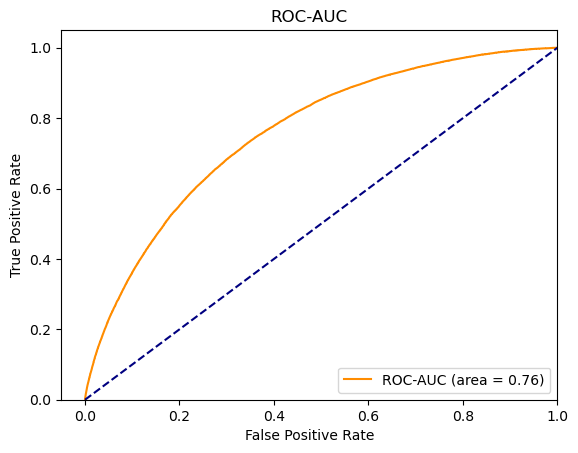

In [24]:
# рассчитываем ROC-AUC
fpr, tpr, treshold = roc_curve(y_test, y_pred)
nn_auc = roc_auc_score(y_test, y_pred)
print('CNN: ROC-AUC=%.3f' % (nn_auc))
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-AUC (area = %0.2f)' % nn_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')
plt.legend(loc="lower right")
plt.show()